# CatBoost and CoreML tutorial — Titanic dataset

CatBoost does support model export to Apple's [CoreML](https://developer.apple.com/machine-learning/) format, which lets you to easily embed ML models into applications on Apple's platforms.

Currently, export of models with only float and one-hot features supported.

This tutorial demonstrates exporting of CatBoost model trained on  [Titanic](https://www.kaggle.com/c/titanic/data) dataset to CoreML model.

In [6]:
import catboost

Get titanic dataset:

In [7]:
import numpy as np

from catboost import Pool
from catboost.datasets import titanic

In [8]:
train_df = titanic()[0]
X, y = train_df.drop('Survived', axis=1), train_df.Survived

In [9]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let us drop Name and Ticket features as they can't be one-hot features (currently, one_hot_max_size can not be more than 255).

In [10]:
X.drop(['Name', 'Ticket'], axis=1, inplace=True)
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [11]:
is_cat = (X.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]

In [12]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NAN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NAN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NAN,S


In [13]:
train_pool = Pool(data=X, label=y, cat_features=cat_features_index)

Train the model:

In [14]:
model = catboost.CatBoost(params={'loss_function': 'Logloss', 'one_hot_max_size': 255})
model.fit(train_pool)

Learning rate set to 0.016216
0:	learn: 0.6862663	total: 135ms	remaining: 2m 14s
1:	learn: 0.6778094	total: 214ms	remaining: 1m 46s
2:	learn: 0.6692441	total: 274ms	remaining: 1m 30s
3:	learn: 0.6608834	total: 348ms	remaining: 1m 26s
4:	learn: 0.6521388	total: 396ms	remaining: 1m 18s
5:	learn: 0.6436183	total: 491ms	remaining: 1m 21s
6:	learn: 0.6367984	total: 549ms	remaining: 1m 17s
7:	learn: 0.6282401	total: 601ms	remaining: 1m 14s
8:	learn: 0.6207336	total: 651ms	remaining: 1m 11s
9:	learn: 0.6132823	total: 751ms	remaining: 1m 14s
10:	learn: 0.6073989	total: 802ms	remaining: 1m 12s
11:	learn: 0.6002848	total: 863ms	remaining: 1m 11s
12:	learn: 0.5948368	total: 948ms	remaining: 1m 11s
13:	learn: 0.5889532	total: 1.05s	remaining: 1m 13s
14:	learn: 0.5833044	total: 1.12s	remaining: 1m 13s
15:	learn: 0.5779508	total: 1.18s	remaining: 1m 12s
16:	learn: 0.5725944	total: 1.25s	remaining: 1m 12s
17:	learn: 0.5687530	total: 1.36s	remaining: 1m 14s
18:	learn: 0.5657881	total: 1.44s	remaining:

161:	learn: 0.4101313	total: 9.39s	remaining: 48.6s
162:	learn: 0.4100184	total: 9.47s	remaining: 48.7s
163:	learn: 0.4096444	total: 9.52s	remaining: 48.5s
164:	learn: 0.4095930	total: 9.61s	remaining: 48.6s
165:	learn: 0.4094594	total: 9.7s	remaining: 48.8s
166:	learn: 0.4094562	total: 9.76s	remaining: 48.7s
167:	learn: 0.4092719	total: 9.92s	remaining: 49.1s
168:	learn: 0.4088827	total: 10.1s	remaining: 49.9s
169:	learn: 0.4088539	total: 10.2s	remaining: 49.8s
170:	learn: 0.4086379	total: 10.3s	remaining: 50.1s
171:	learn: 0.4086051	total: 10.5s	remaining: 50.5s
172:	learn: 0.4084949	total: 10.6s	remaining: 50.8s
173:	learn: 0.4084083	total: 10.7s	remaining: 50.6s
174:	learn: 0.4079159	total: 10.7s	remaining: 50.5s
175:	learn: 0.4078730	total: 10.7s	remaining: 50.2s
176:	learn: 0.4077421	total: 10.8s	remaining: 50.1s
177:	learn: 0.4077400	total: 10.8s	remaining: 49.8s
178:	learn: 0.4074727	total: 10.8s	remaining: 49.7s
179:	learn: 0.4073587	total: 10.9s	remaining: 49.5s
180:	learn: 0

320:	learn: 0.3907622	total: 15.2s	remaining: 32.1s
321:	learn: 0.3906724	total: 15.2s	remaining: 32s
322:	learn: 0.3906007	total: 15.2s	remaining: 31.9s
323:	learn: 0.3905332	total: 15.2s	remaining: 31.8s
324:	learn: 0.3905117	total: 15.2s	remaining: 31.7s
325:	learn: 0.3905116	total: 15.3s	remaining: 31.5s
326:	learn: 0.3903700	total: 15.3s	remaining: 31.4s
327:	learn: 0.3903700	total: 15.3s	remaining: 31.3s
328:	learn: 0.3903679	total: 15.3s	remaining: 31.2s
329:	learn: 0.3903376	total: 15.3s	remaining: 31.1s
330:	learn: 0.3902952	total: 15.3s	remaining: 31s
331:	learn: 0.3902551	total: 15.4s	remaining: 30.9s
332:	learn: 0.3902021	total: 15.4s	remaining: 30.8s
333:	learn: 0.3901245	total: 15.4s	remaining: 30.7s
334:	learn: 0.3900258	total: 15.4s	remaining: 30.6s
335:	learn: 0.3900128	total: 15.4s	remaining: 30.5s
336:	learn: 0.3899495	total: 15.5s	remaining: 30.4s
337:	learn: 0.3899495	total: 15.5s	remaining: 30.3s
338:	learn: 0.3898760	total: 15.5s	remaining: 30.2s
339:	learn: 0.38

483:	learn: 0.3766564	total: 18.6s	remaining: 19.8s
484:	learn: 0.3765976	total: 18.6s	remaining: 19.8s
485:	learn: 0.3764428	total: 18.6s	remaining: 19.7s
486:	learn: 0.3764251	total: 18.6s	remaining: 19.6s
487:	learn: 0.3763810	total: 18.7s	remaining: 19.6s
488:	learn: 0.3762968	total: 18.7s	remaining: 19.5s
489:	learn: 0.3759569	total: 18.7s	remaining: 19.5s
490:	learn: 0.3759416	total: 18.7s	remaining: 19.4s
491:	learn: 0.3758789	total: 18.8s	remaining: 19.4s
492:	learn: 0.3758217	total: 18.8s	remaining: 19.3s
493:	learn: 0.3757920	total: 18.8s	remaining: 19.3s
494:	learn: 0.3756416	total: 18.8s	remaining: 19.2s
495:	learn: 0.3754934	total: 18.9s	remaining: 19.2s
496:	learn: 0.3754537	total: 18.9s	remaining: 19.1s
497:	learn: 0.3752817	total: 18.9s	remaining: 19.1s
498:	learn: 0.3752433	total: 18.9s	remaining: 19s
499:	learn: 0.3750463	total: 19s	remaining: 19s
500:	learn: 0.3750366	total: 19s	remaining: 18.9s
501:	learn: 0.3749992	total: 19s	remaining: 18.8s
502:	learn: 0.3749841	

642:	learn: 0.3570637	total: 23.9s	remaining: 13.3s
643:	learn: 0.3570292	total: 24s	remaining: 13.2s
644:	learn: 0.3569565	total: 24s	remaining: 13.2s
645:	learn: 0.3566618	total: 24s	remaining: 13.2s
646:	learn: 0.3565710	total: 24s	remaining: 13.1s
647:	learn: 0.3564828	total: 24.1s	remaining: 13.1s
648:	learn: 0.3564385	total: 24.1s	remaining: 13s
649:	learn: 0.3563763	total: 24.1s	remaining: 13s
650:	learn: 0.3563345	total: 24.1s	remaining: 12.9s
651:	learn: 0.3558225	total: 24.1s	remaining: 12.9s
652:	learn: 0.3554772	total: 24.2s	remaining: 12.8s
653:	learn: 0.3554196	total: 24.2s	remaining: 12.8s
654:	learn: 0.3553469	total: 24.2s	remaining: 12.7s
655:	learn: 0.3552358	total: 24.2s	remaining: 12.7s
656:	learn: 0.3549341	total: 24.2s	remaining: 12.7s
657:	learn: 0.3547803	total: 24.3s	remaining: 12.6s
658:	learn: 0.3545868	total: 24.3s	remaining: 12.6s
659:	learn: 0.3545120	total: 24.3s	remaining: 12.5s
660:	learn: 0.3543055	total: 24.3s	remaining: 12.5s
661:	learn: 0.3542940	to

807:	learn: 0.3381678	total: 28.8s	remaining: 6.85s
808:	learn: 0.3381096	total: 28.9s	remaining: 6.81s
809:	learn: 0.3380727	total: 28.9s	remaining: 6.78s
810:	learn: 0.3380185	total: 28.9s	remaining: 6.74s
811:	learn: 0.3379363	total: 28.9s	remaining: 6.7s
812:	learn: 0.3378905	total: 29s	remaining: 6.66s
813:	learn: 0.3378048	total: 29s	remaining: 6.62s
814:	learn: 0.3376651	total: 29s	remaining: 6.58s
815:	learn: 0.3376206	total: 29s	remaining: 6.54s
816:	learn: 0.3375652	total: 29.1s	remaining: 6.51s
817:	learn: 0.3375102	total: 29.1s	remaining: 6.47s
818:	learn: 0.3374458	total: 29.1s	remaining: 6.43s
819:	learn: 0.3371621	total: 29.1s	remaining: 6.39s
820:	learn: 0.3370547	total: 29.1s	remaining: 6.35s
821:	learn: 0.3369500	total: 29.2s	remaining: 6.32s
822:	learn: 0.3367312	total: 29.2s	remaining: 6.28s
823:	learn: 0.3365644	total: 29.2s	remaining: 6.24s
824:	learn: 0.3363436	total: 29.3s	remaining: 6.21s
825:	learn: 0.3362778	total: 29.3s	remaining: 6.18s
826:	learn: 0.3362604

968:	learn: 0.3243293	total: 33.9s	remaining: 1.08s
969:	learn: 0.3241879	total: 33.9s	remaining: 1.05s
970:	learn: 0.3241601	total: 33.9s	remaining: 1.01s
971:	learn: 0.3240854	total: 34s	remaining: 978ms
972:	learn: 0.3238748	total: 34s	remaining: 943ms
973:	learn: 0.3238302	total: 34s	remaining: 908ms
974:	learn: 0.3238053	total: 34s	remaining: 873ms
975:	learn: 0.3237571	total: 34.1s	remaining: 837ms
976:	learn: 0.3236543	total: 34.1s	remaining: 802ms
977:	learn: 0.3236187	total: 34.1s	remaining: 768ms
978:	learn: 0.3235611	total: 34.2s	remaining: 733ms
979:	learn: 0.3235116	total: 34.2s	remaining: 698ms
980:	learn: 0.3234897	total: 34.2s	remaining: 663ms
981:	learn: 0.3234700	total: 34.2s	remaining: 628ms
982:	learn: 0.3234310	total: 34.3s	remaining: 593ms
983:	learn: 0.3232538	total: 34.3s	remaining: 558ms
984:	learn: 0.3231573	total: 34.3s	remaining: 523ms
985:	learn: 0.3231406	total: 34.4s	remaining: 488ms
986:	learn: 0.3231089	total: 34.4s	remaining: 453ms
987:	learn: 0.323085

Predict probabilities:

In [15]:
test_pool = Pool(data=X[0:1], cat_features=cat_features_index)

In [16]:
model.predict(test_pool, prediction_type="Probability")

array([[0.88003974, 0.11996026]])

Save model:

In [ ]:
model.save_model(
    "titanic.mlmodel",
    format="coreml",
    export_parameters={
        'prediction_type': 'probability'
    }
)

Now you can import saved model to XCode and use it directly from swift:

```swift
import CoreML

let model = titanic()

let pclass = "1"
let sex = "female"
let age = 38.0
let sibsp = "1"
let parch = "0"
let fare = 71.2833
let cabin = "C85"
let embarked = "C"

guard let titanicOutput = try? model.prediction(feature_3: age, feature_6: fare, feature_1: pclass, feature_2: sex, feature_4: sibsp, feature_5: parch, feature_7: cabin, feature_8: embarked) else {
            fatalError("Unexpected runtime error.")
        }

print(String(
    format: "Probability of survival: %1.5f",
    titanicOutput.prediction[0].doubleValue
))
```

If you want to practice, titanic model is easy to integrate into Apple's  [MarsHabitatPricer](https://developer.apple.com/documentation/coreml/integrating_a_core_ml_model_into_your_app) example project:

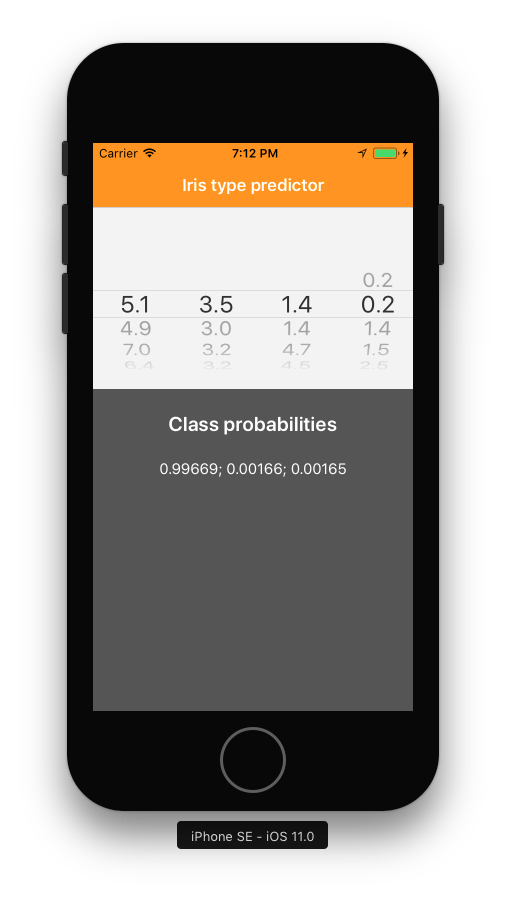